# 簡介機器學習
### 可大致分為監督鄰近分類學習和非監督兩種學習方法
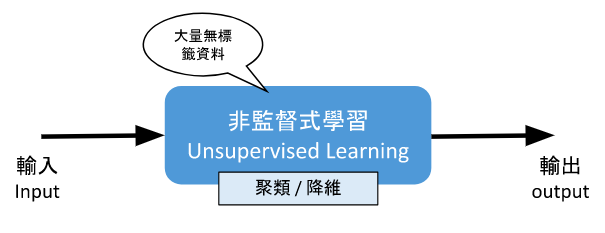
1. 非監督式學習(Unsupervised Learing)的訓練資料不需要事先以人力處理標籤，機器面對資料時，做的處理是依照關聯性去歸類、找出潛在規則與套路、形成集群，不對資訊有正確或不正確的判別
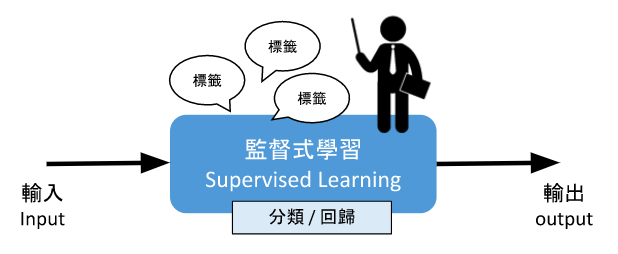
2. 監督式學習 (Supervised learning) 是電腦從標籤化 (labeled) 的資訊中分析模式後做出預測的學習方式。標記過的資料就好比標準答案，電腦在學習的過程透過對比誤差，一邊修正去達到更精準的預測，這樣的方式讓監督式學習有準確率高的優點。 

 根據不同特徵值之間的距離來進行分類的一種簡單的機器學習方法，它是一種簡單但是懶惰的演算法。他的訓練資料都是有標籤的資料，即訓練的資料都有自己的類別。KNN演算法主要應用領域是對未知事物進行分類，即判斷未知事物屬於哪一類，判斷透過歐幾里得定理，判斷未知事物的特徵和哪一類已知事物的的特徵最接近。它也可以用於遞迴，通過找出一個樣本的k個最近鄰居，將這些鄰居的屬性的平均值賦給該樣本，就可以得到該樣本的屬性。

 儘管很簡單，近鄰方法在處理資料量多的分類及迴歸分析上很成功

# KNN Algorithm 

### 之使用airbnb做房價預測

* KNN又稱K最近鄰居是基於監督學習技術的最簡單的機器學習算法之一。  

* KNN算法假設新案例/數據與可用案例之間具有相似性，並將新案例放入與可用類別最相似的類別中。

* KNN算法存儲所有可用數據，並基於相似度對新數據點進行分類。這意味著，當出現新數據時，可以使用K-NN算法將其輕鬆分類為鑽井套件類別。

* KNN算法既可以用於回歸也可以用於分類，但是大多數情況下用於分類問題。

* KNN是一種非參數算法，這意味著它不會對基礎數據進行任何假設。

* 它也稱為惰性學習器算法，因為它不立即從訓練集中學習，而是存儲數據集，並且在分類時對數據集執行操作。

* 訓練階段的KNN算法僅存儲數據集，並在獲取新數據時將其分類為與新數據非常相似的類別。


假設我們有一個看起來類似於婊子和狗的生物的圖像，但是我們想知道它是婊子還是狗。因此，對於這種識別，我們可以使用KNN算法，因為它適用於相似性度量。我們的KNN模型將發現新數據集與婊子和狗圖像相似的特徵，並基於最相似的特徵將其分類為婊子或狗類別。
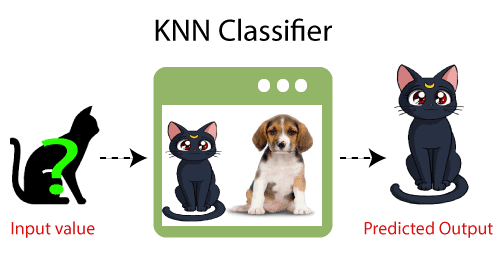


## Airbnb in Taipe
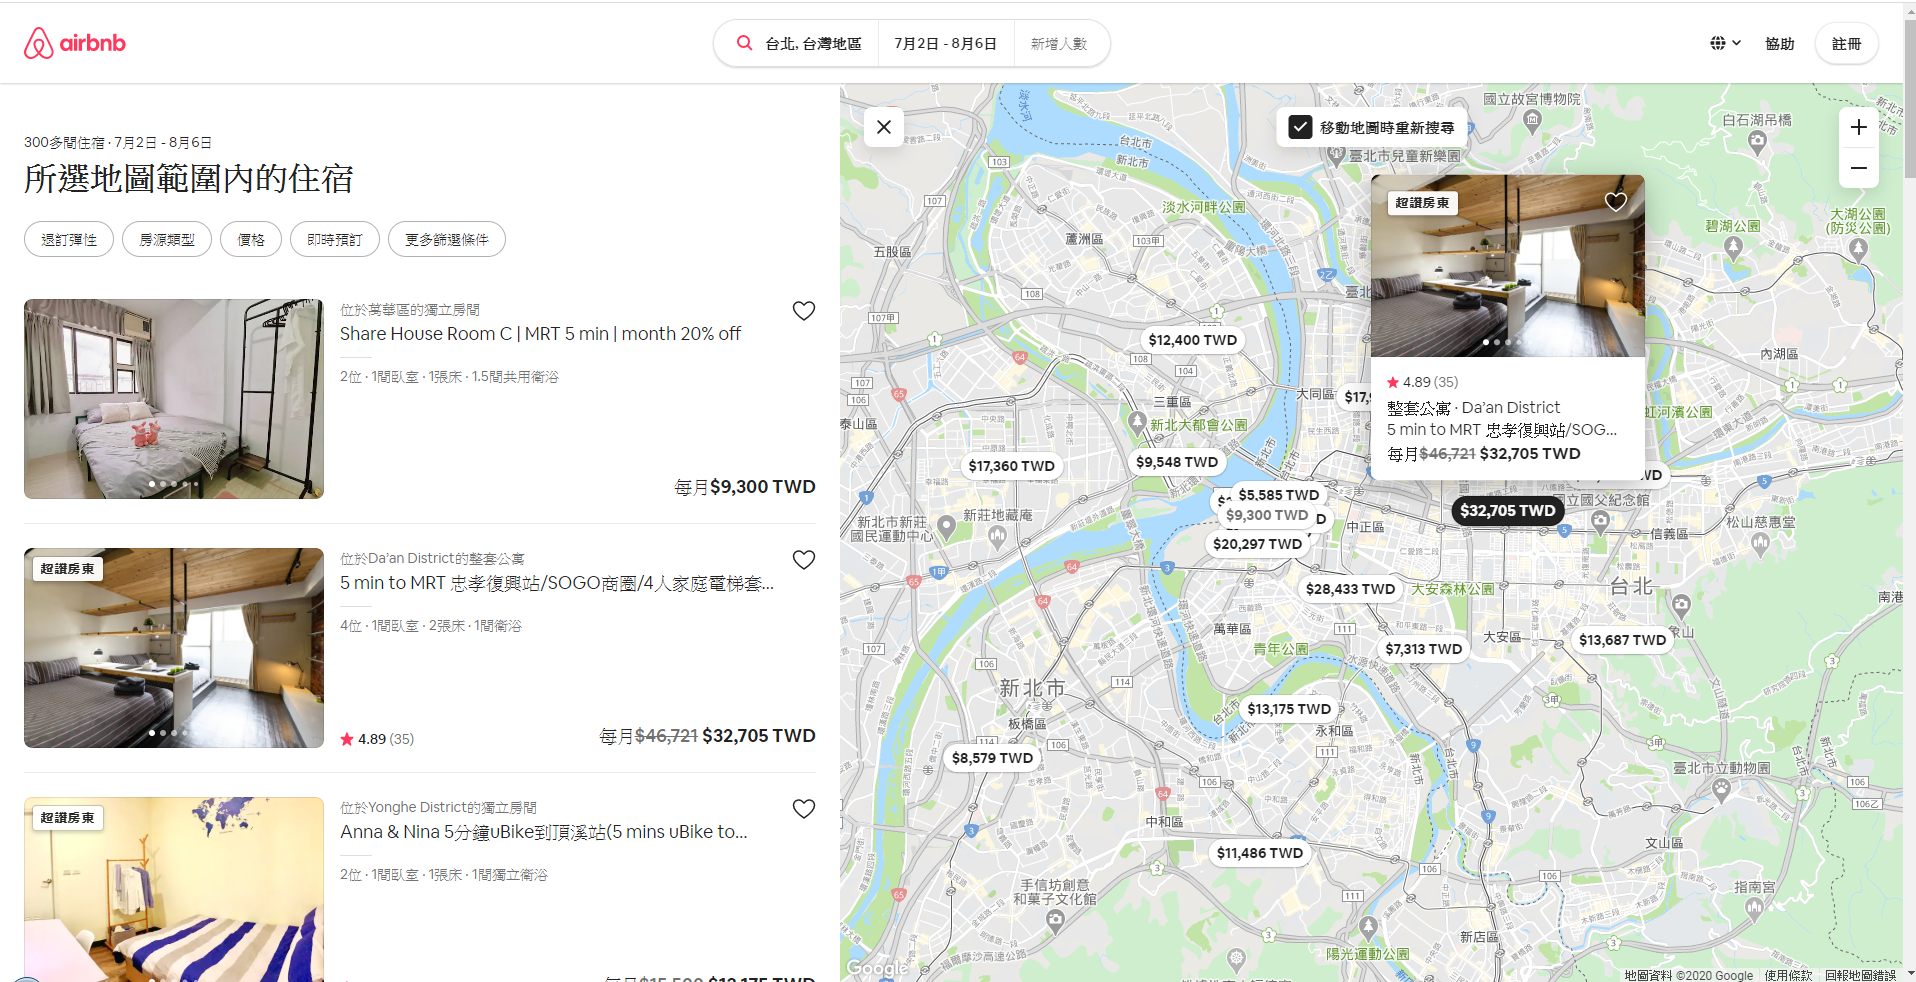

台北他媽的居大不易，除非你青春的身體，不然應該付出金錢上的代價，來換得一個短期的藏身之地

## 資料抓取

因此我們先寫好一個爬蟲，去抓取官網上的資訊吧(?)
下次好了....
有一個叫做 http://insideairbnb.com/ 的非官方網站
會抓取官網上的資訊
大概每一年會至少更新一次
我拿了今年五月的資料用用

In [2]:
import pandas as pd

features = ['accommodates','bedrooms','bathrooms','beds','price','minimum_nights','maximum_nights','number_of_reviews']
#篩選出有用的特徵

dc_listings = pd.read_csv('listings2.csv',low_memory=False)

dc_listings = dc_listings[features]

print(dc_listings.shape)

dc_listings.head()

(8409, 8)


,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,2,1.0,1.0,1.0,"$1,498.00",7,365,2
1,2,1.0,1.0,1.0,$898.00,30,365,7
2,3,1.0,1.0,1.0,"$1,496.00",3,28,49
3,2,1.0,1.5,1.0,"$1,258.00",3,365,52
4,1,1.0,4.0,4.0,$389.00,1,90,77


擷取的特徵 (listing2.csv 有很多跟我一樣廢的資訊 這邊只取幾個比較有用的)
* accommodates: 可以容納的房客
* bedrooms: 房間的數量
* bathrooms: 廁所的數量
* beds: 床的數量
* price: 一晚的費用
* minimum_nights: 客人最少租了幾天
* maximum_nights: 客人最多租了幾天
* number_of_reviews: 評論數

## 如果我今天他媽的有一張床，也沒有女生要住我家，我能租多少錢?
--> 484要看看別人都賣多少


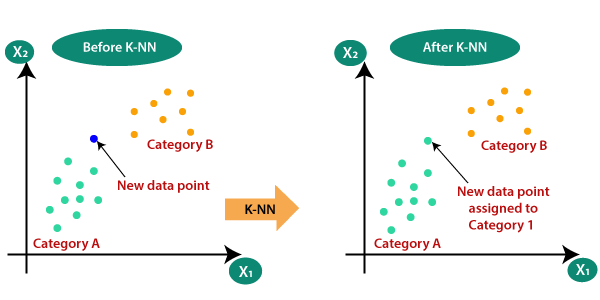

K代表我们的候选对象个数，也就是找和我房间数量最相近的其他房子的价格

## K近邻原理

<img src="3.png" style="width:600px;height:330px;float:left">

假设我们的数据源中只有5条信息，现在我想针对我的房子（只有一个房间）来定一个价格。

<img src="4.png" style="width:600px;height:330px;float:left">

在这里假设我们选择的K=3，也就是选3个跟我最相近的房源。

<img src="5.png" style="width:600px;height:330px;float:left">

再综合考虑这三个我就得到了我的房子大概能值多钱啦！

## 距离的定义
如何才能知道哪些数据样本跟我最相近呢？

<img src="6.png" style="width:400px;height:80px;float:left">

其中Q1到Qn是一条数据的所有特征信息，P1到Pn是另一条数据的所有特征信息

假设我们的房子有3个房间

In [3]:
import numpy as np

our_acc_value = 3

dc_listings['distance'] = np.abs(dc_listings.accommodates - our_acc_value)
dc_listings.distance.value_counts().sort_index()

0      777
1     4737
2     1276
3      653
4      146
5      319
6       59
7      123
8       24
9       88
10      16
11      28
12      15
13     148
Name: distance, dtype: int64

这里我们只有了绝对值来计算，和我们距离为0的（同样数量的房间）有461个

sample操作可以得到洗牌后的数据

In [4]:
dc_listings = dc_listings.sample(frac=1,random_state=0)
dc_listings = dc_listings.sort_values('distance')
dc_listings.price.head()

2330      $509.00
1592    $1,736.00
4581    $2,514.00
8142    $3,685.00
7793    $1,107.00
Name: price, dtype: object

现在的问题是，这里面的数据是字符串呀，需要转换一下！

In [5]:
dc_listings['price'] = dc_listings.price.str.replace("\$|,",'').astype(float)

mean_price = dc_listings.price.iloc[:5].mean()
mean_price

1910.2

得到了平均价格，也就是我们的房子大致的价格了

## 模型的评估

<img src="7.png" style="width:600px;height:250px;float:left">

首先制定好训练集和测试集

In [6]:
dc_listings.drop('distance',axis=1)

train_df = dc_listings.copy().iloc[:2792]
test_df = dc_listings.copy().iloc[2792:]

基于单变量预测价格

In [7]:
def predict_price(new_listing_value,feature_column):
    temp_df = train_df
    temp_df['distance'] = np.abs(dc_listings[feature_column] - new_listing_value)
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return(predicted_price)

In [8]:
test_df['predicted_price'] = test_df.accommodates.apply(predict_price,feature_column='accommodates')


这样我们就得到了测试集中，所以房子的价格了

root mean squared error (RMSE)均方根误差

<img src="8.png" style="width:700px;height:100px;float:left">

In [9]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
rmse = mse ** (1/2)
rmse

10128.775096721143

现在我们得到了对于一个变量的模型评估得分

## 不同的变量效果会不会不同呢？

In [10]:
.

RMSE for the accommodates column: 10128.775096721143
RMSE for the bedrooms column: 10152.41986962611
RMSE for the bathrooms column: 10200.366737765708
RMSE for the number_of_reviews column: 10221.967555276657


看起来结果差异还是蛮大的，接下来我们要做的就是综合利用所有的信息来一起进行测试

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
features = ['accommodates','bedrooms','bathrooms','beds','price','minimum_nights','maximum_nights','number_of_reviews']

dc_listings = pd.read_csv('listings.csv')

dc_listings = dc_listings[features]

dc_listings['price'] = dc_listings.price.str.replace("\$|,",'').astype(float)

dc_listings = dc_listings.dropna()

dc_listings[features] = StandardScaler().fit_transform(dc_listings[features])

normalized_listings = dc_listings

print(dc_listings.shape)

normalized_listings.head()

(3671, 8)


,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,0.401420,-0.249501,-0.439211,0.297386,0.081119,-0.341421,-0.016575,-0.516779
1,1.399466,2.129508,2.969551,1.141704,1.462622,-0.065047,-0.016606,1.706767
2,-1.095648,-0.249501,1.265170,-0.546933,-0.718699,-0.065047,-0.016575,-0.482571
3,-0.596625,-0.249501,-0.439211,-0.546933,-0.391501,-0.341421,-0.016575,-0.516779
4,0.401420,-0.249501,-0.439211,-0.546933,-0.718699,1.316824,-0.016575,-0.516779


In [12]:
norm_train_df = normalized_listings.copy().iloc[0:2792]
norm_test_df = normalized_listings.copy().iloc[2792:]

多变量距离的计算

<img src="9.png" style="width:700px;height:400px;float:left">

scipy中已经有现成的距离的计算工具了

In [13]:
from scipy.spatial import distance

first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]
fifth_listing = normalized_listings.iloc[20][['accommodates', 'bathrooms']]
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)
first_fifth_distance

3.723019604017032

## 多变量KNN模型

In [14]:
def predict_price_multivariate(new_listing_value,feature_columns):
    temp_df = norm_train_df
    temp_df['distance'] = distance.cdist(temp_df[feature_columns],[new_listing_value[feature_columns]])
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return(predicted_price)

cols = ['accommodates', 'bathrooms']
norm_test_df['predicted_price'] = norm_test_df[cols].apply(predict_price_multivariate,feature_columns=cols,axis=1)    
norm_test_df['squared_error'] = (norm_test_df['predicted_price'] - norm_test_df['price'])**(2)
mse = norm_test_df['squared_error'].mean()
rmse = mse ** (1/2)
print(rmse)

0.7894063922577537


## 使用Sklearn來完成KNN

In [15]:
from sklearn.neighbors import KNeighborsRegressor
cols = ['accommodates','bedrooms']
knn = KNeighborsRegressor()
knn.fit(norm_train_df[cols], norm_train_df['price'])
two_features_predictions = knn.predict(norm_test_df[cols])

In [16]:
from sklearn.metrics import mean_squared_error

two_features_mse = mean_squared_error(norm_test_df['price'], two_features_predictions)
two_features_rmse = two_features_mse ** (1/2)
print(two_features_rmse)

0.8426824704818202


加入更多的特征

In [17]:
knn = KNeighborsRegressor(5)

cols = ['accommodates','bedrooms','bathrooms','beds','minimum_nights','maximum_nights','number_of_reviews']

knn.fit(norm_train_df[cols], norm_train_df['price'])
four_features_predictions = knn.predict(norm_test_df[cols])
four_features_mse = mean_squared_error(norm_test_df['price'], four_features_predictions)
four_features_rmse = four_features_mse ** (1/2)
four_features_rmse


0.8243838530880285

# 參考資料
* https://www.twblogs.net/a/5baab1662b7177781a0e63a0
* https://blog.csdn.net/weixin_41789707/article/details/80930274?utm_source=copy
* https://scikit-learn.org/stable/modules/neighbors.html?fbclid=IwAR1fuB0TtM1ZpzzNyHvHWc9mw0KqKzuDgmnXQON9UcOByosoNEWNgJJda8Y#ball-tree
* https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning?fbclid=IwAR2dRxMOfVOu1eXw9STV8vAw-YQmeGQTL-LcCLiPCYDkIYGgrRV5Tp-LYdQ